In [ ]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from glob import glob
from tqdm import tqdm
from PIL import Image

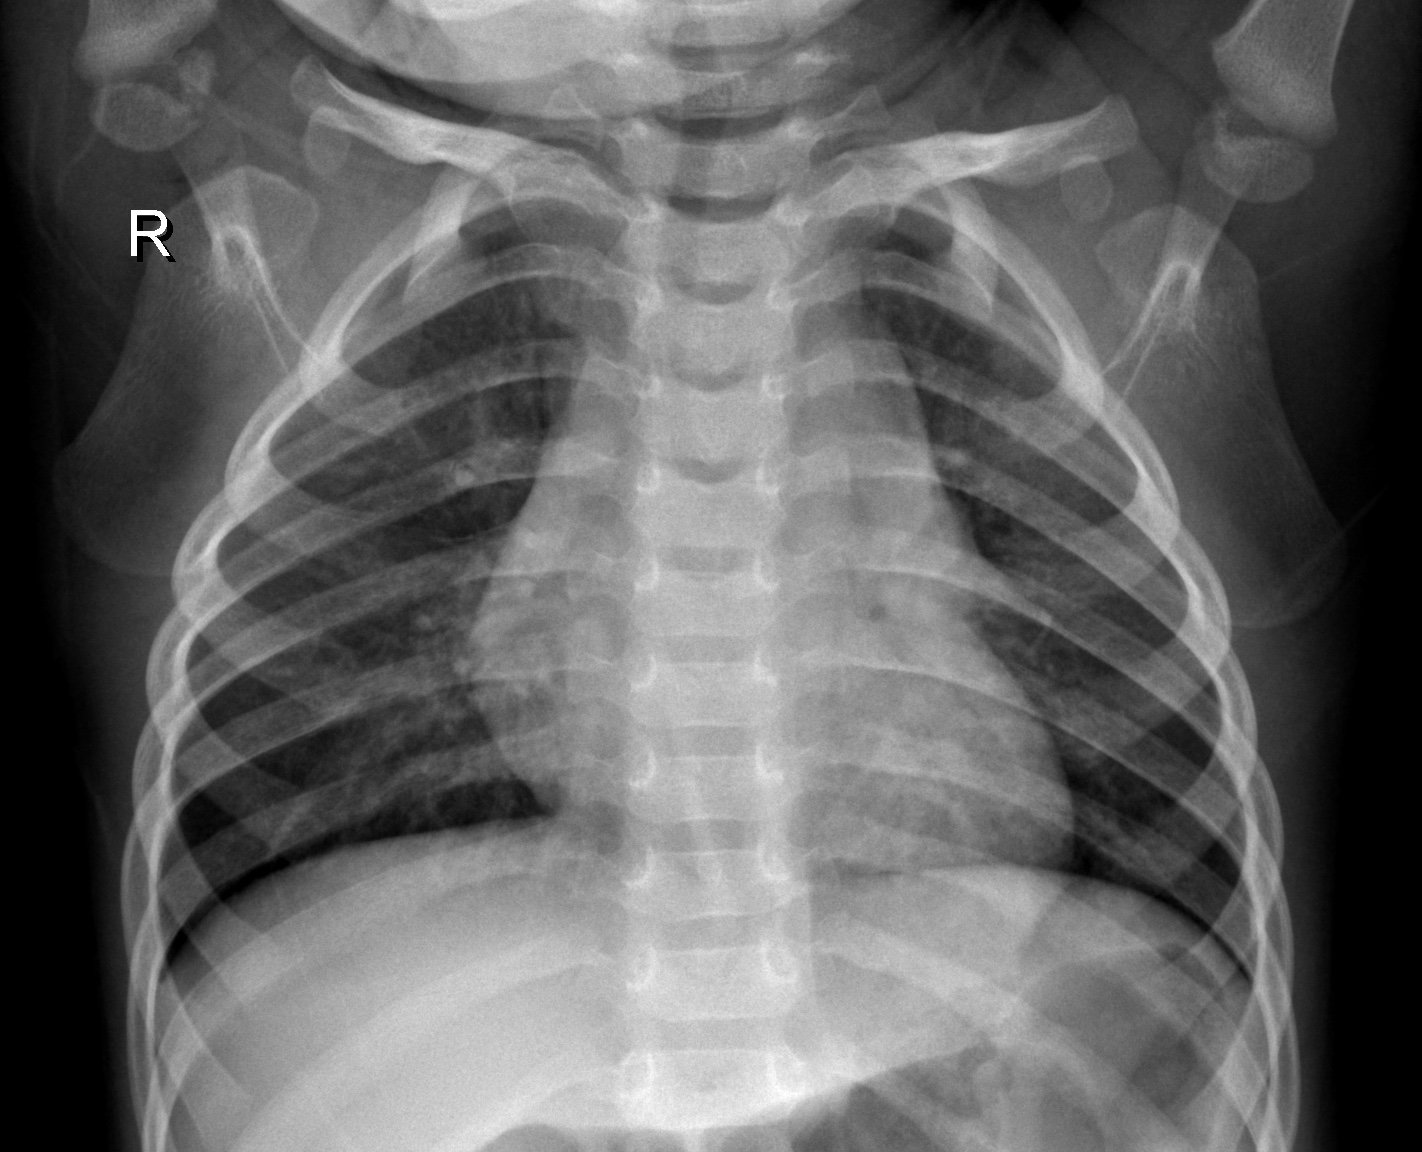

In [ ]:
Image.open(r'D:\Projects\Github\X_Ray_Classification\data\chest_xray\chest_xray\train\NORMAL\IM-0117-0001.jpeg')

Building a DataMap

In [ ]:
def DataMap(folder_path):
    img = glob(folder_path + '/*.jpeg')
    clas = Path(folder_path).name
    split = Path(folder_path).parent.name
    return pd.DataFrame({
        'Image': img,
        'Class': clas,
        'Split': split
    })
    

In [5]:
train_normal = DataMap(r'D:\Projects\Github\X_Ray_Classification\data\chest_xray\chest_xray\train\NORMAL')
train_pneumonia = DataMap(r'D:\Projects\Github\X_Ray_Classification\data\chest_xray\chest_xray\train\PNEUMONIA')

test_normal = DataMap(r'D:\Projects\Github\X_Ray_Classification\data\chest_xray\chest_xray\test\NORMAL')
test_pneumonia = DataMap(r'D:\Projects\Github\X_Ray_Classification\data\chest_xray\chest_xray\test\PNEUMONIA')

val_normal = DataMap(r'D:\Projects\Github\X_Ray_Classification\data\chest_xray\chest_xray\val\NORMAL')
val_pneumonia = DataMap(r'D:\Projects\Github\X_Ray_Classification\data\chest_xray\chest_xray\val\PNEUMONIA')


In [6]:
df = pd.concat([
    train_normal,
    train_pneumonia,
    test_normal,
    test_pneumonia,
    val_normal,
    val_pneumonia
], ignore_index=True)



In [7]:
df['Image'].sample(1)

5795    D:\Projects\Github\X_Ray_Classification\data\c...
Name: Image, dtype: object

In [8]:
sample = df['Image'].sample(1).values[0]

In [9]:
df.shape

(5856, 3)

In [10]:
img = Image.open(sample)

In [11]:
img.size


(1096, 832)

In [12]:
WIDTH = 128
HEIGHT = 128


In [82]:
for i, row in tqdm( df.iterrows() , total=df.shape[0] ):

    img_path = row["Image"]
    img = Image.open(img_path)

    resized_img = img.resize((WIDTH, HEIGHT))

    img_path = Path(img_path)
    img_name = img_path.name
    img_clas = img_path.parent.name
    img_split = img_path.parent.parent.name
    final_img_name = img_split + "_" + img_clas + "_" +img_name

    final_img_path = "data/resized/" + final_img_name

    resized_img.save(final_img_path)

  0%|          | 0/5856 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Projects\\Github\\X_Ray_Classification\\notebooks\\data\\resized\\train_NORMAL_IM-0115-0001.jpeg'

In [13]:
resized_imgs_paths = []

for i, row in tqdm( df.iterrows() , total=df.shape[0] ):

    img_path = row["Image"]
    img_path = Path(img_path)
    img_name = img_path.name
    img_class = img_path.parent.name
    img_split = img_path.parent.parent.name
    final_img_name = img_split + "_" + img_class + "_" +img_name

    final_img_path = "data/resized/" + final_img_name

    resized_imgs_paths.append(final_img_path)

100%|██████████| 5856/5856 [00:00<00:00, 9834.74it/s] 


In [14]:
df["resized"] = resized_imgs_paths

In [15]:
df

,Image,Class,Split,resized
0,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0115-0001.jpeg
1,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0117-0001.jpeg
2,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0119-0001.jpeg
3,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0122-0001.jpeg
4,D:\Projects\Github\X_Ray_Classification\data\c...,NORMAL,train,data/resized/train_NORMAL_IM-0125-0001.jpeg
...,...,...,...,...
5851,D:\Projects\Github\X_Ray_Classification\data\c...,PNEUMONIA,val,data/resized/val_PNEUMONIA_person1949_bacteria...
5852,D:\Projects\Github\X_Ray_Classification\data\c...,PNEUMONIA,val,data/resized/val_PNEUMONIA_person1950_bacteria...
5853,D:\Projects\Github\X_Ray_Classification\data\c...,PNEUMONIA,val,data/resized/val_PNEUMONIA_person1951_bacteria...
5854,D:\Projects\Github\X_Ray_Classification\data\c...,PNEUMONIA,val,data/resized/val_PNEUMONIA_person1952_bacteria...


In [17]:
df.to_csv("data/data_map.csv", index=False)
df.to_csv("data_map.csv", index=False)

In [ ]:
#what stratify does?
#https://stackoverflow.com/questions/26521219/what-does-stratify-do-in-scikit-learn
#https://stackoverflow.com/questions/33704004/what-is-the-difference-between-stratify-and-same-stratify
